# THE SPARKS FOUNDATION GRIP TASK - 4

## AUTHOR: MALLIKA ADAK

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP, JULY - 2021

#### TASK -4: EXPLORATORY DATA ANALYSIS- TERRORISM

OBJECTIVE: To find out the hot zone of terrorism using an exploratory data analysis on "GlobalTerrorism" dataset. Also, to examine various security issues and insights by EDA.

Dataset: https://bit.ly/2TK5Xn5

### 1) Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 2) Reading the Data from the Source

In [2]:
dataset = pd.read_csv('D:\MALLIKA\globalterrorism.csv',encoding='ISO-8859-1')
print('Data set imported successfully')

dataset.head()

Data set imported successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### 3) Familiarizing with Data

In [3]:
#Shape of dataframe
dataset.shape

(181691, 135)

In [4]:
# Determining the different columns in the dataset
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
#Renaming Columns
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
dataset=dataset[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
#Renamed Dataset
dataset.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
#checking for null value
dataset.isna().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [10]:
# Describing the dataset by various parameters
dataset.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [11]:
#unique value in dataset
dataset.nunique()

Year               47
Month              13
Day                32
Country           205
state            2855
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

In [12]:
# Evaluating correlation coefficient 
dataset.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


### 4) Visualization of data

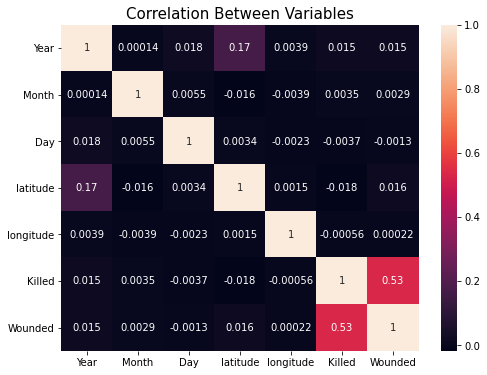

In [13]:
# plotting the heatmap of correlation matrix using seaborn
fig=plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Correlation Between Variables',fontsize='15')
plt.show()

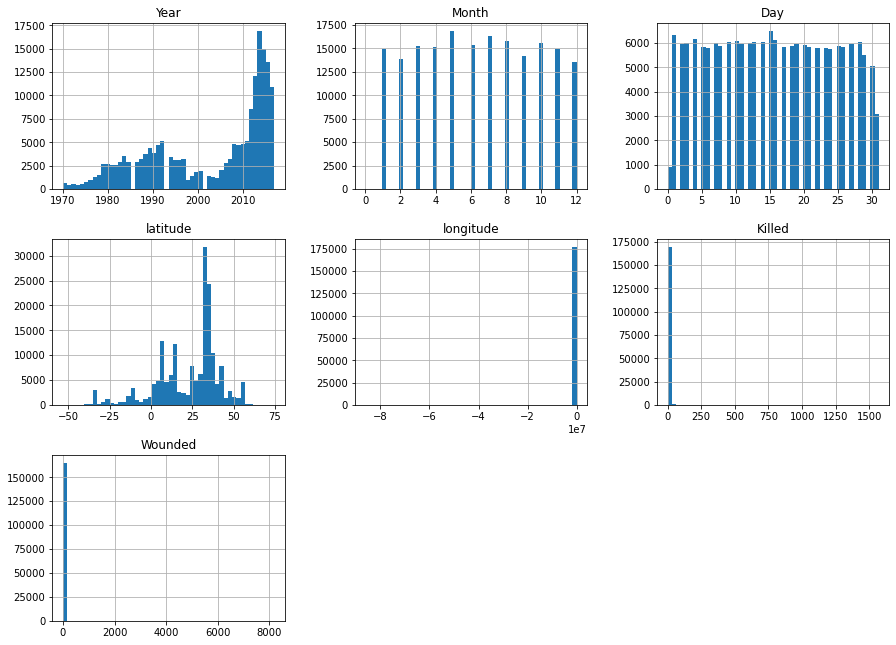

In [14]:
#histogram for Visualizing
dataset.hist(bins = 50,figsize = (15,11));

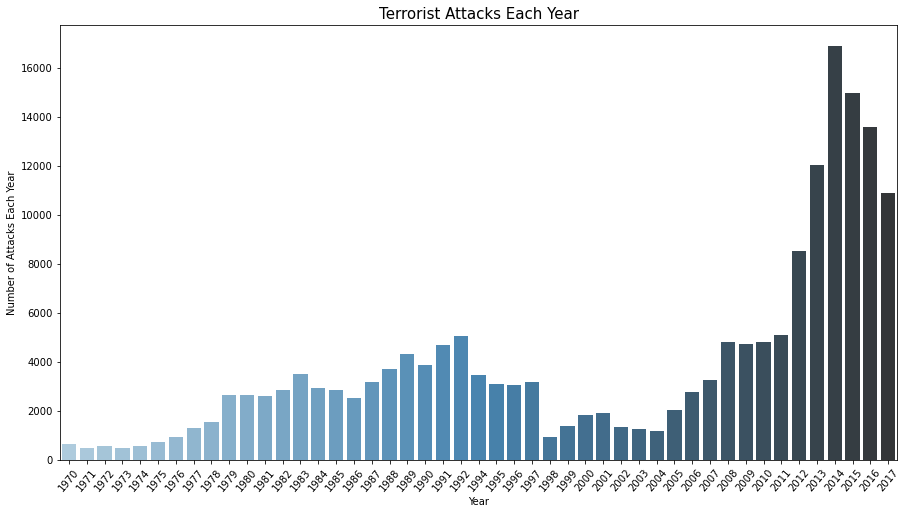

In [15]:
x_year = dataset['Year'].unique()
y_count_years = dataset['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,8))
sns.barplot(x = x_year, y = y_count_years, palette = 'Blues_d')
plt.xticks(rotation = 50)
plt.xlabel('Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Terrorist Attacks Each Year',fontsize='15')
plt.show()

In [16]:
dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int)
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
dataset['Casualities'] = dataset['Killed'] + dataset['Wounded']

In [17]:
dataset1 = dataset.sort_values(by='Casualities',ascending=False).reset_index()
dataset1.head()

,index,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
1,73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
2,58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
3,68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
4,133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


In [18]:
heat=dataset1.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,...,5.852657,5.306163,5.273063,8.232779,5.569775,5.565489,5.770285,6.848029,7.808905,8.570721
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,5.392523,3.842593,3.290000,3.933333,3.292683,6.772727,5.153846,2.500000,1.222222,2.214286
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.333333,...,0.000000,2.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.666667


In [19]:
#Top Affected Countries
attack=dataset.Country.value_counts()[:20]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

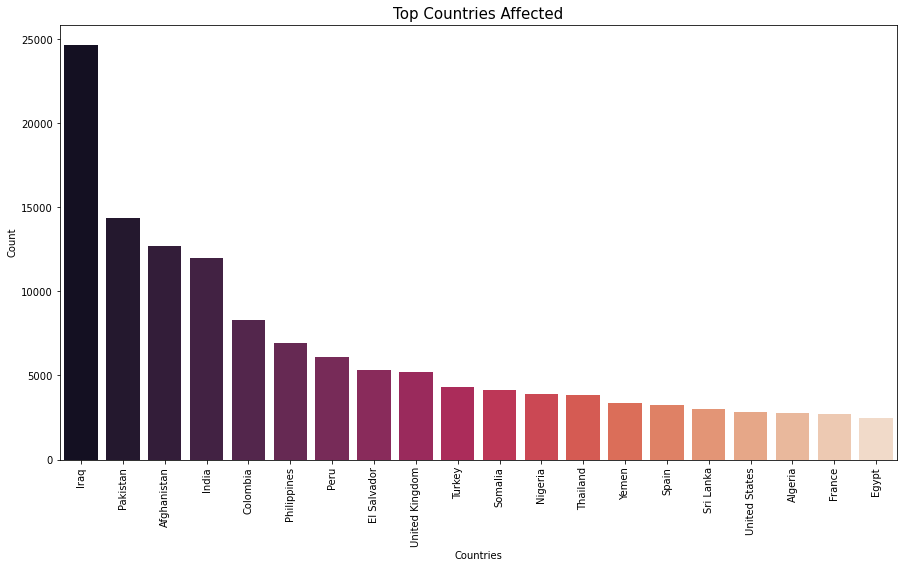

In [20]:
plt.subplots(figsize=(15,8))
sns.barplot(dataset['Country'].value_counts()[:20].index,dataset['Country'].value_counts()[:20].values,palette='rocket')
plt.title('Top Countries Affected',fontsize='15')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

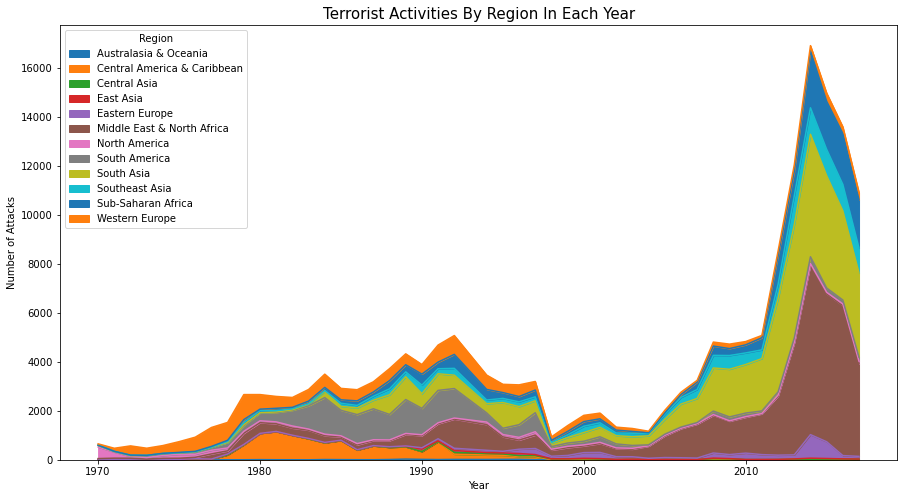

In [21]:
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(15,8))
plt.title('Terrorist Activities By Region In Each Year',fontsize='15')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

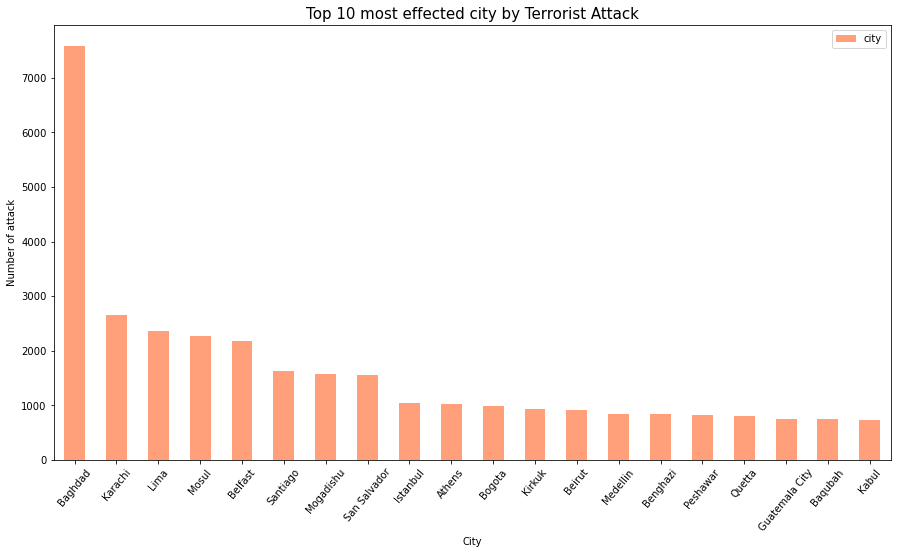

In [22]:
dataset['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).drop('Unknown').head(20).plot(kind='bar',figsize=(15,8),color='lightsalmon')
plt.xticks(rotation = 50)
plt.xlabel("City")
plt.ylabel("Number of attack")
plt.title("Top 10 most effected city by Terrorist Attack",fontsize=15)
plt.show()

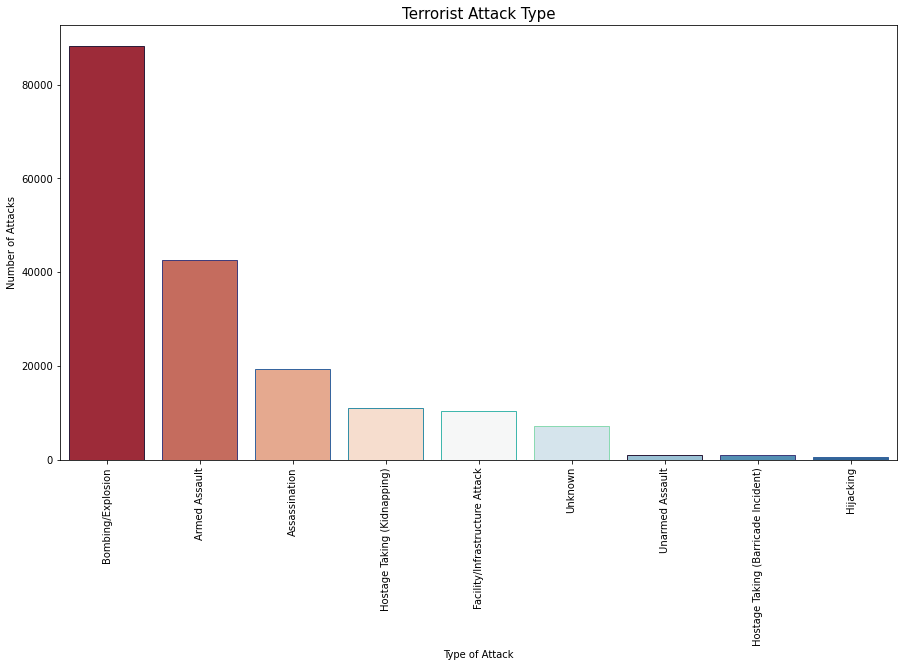

In [23]:
plt.subplots(figsize=(15,8))
sns.countplot(dataset["AttackType"],order=dataset['AttackType'].value_counts().index,palette="RdBu",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Type of Attack")
plt.ylabel("Number of Attacks")
plt.title("Terrorist Attack Type",fontsize=15)
plt.show()

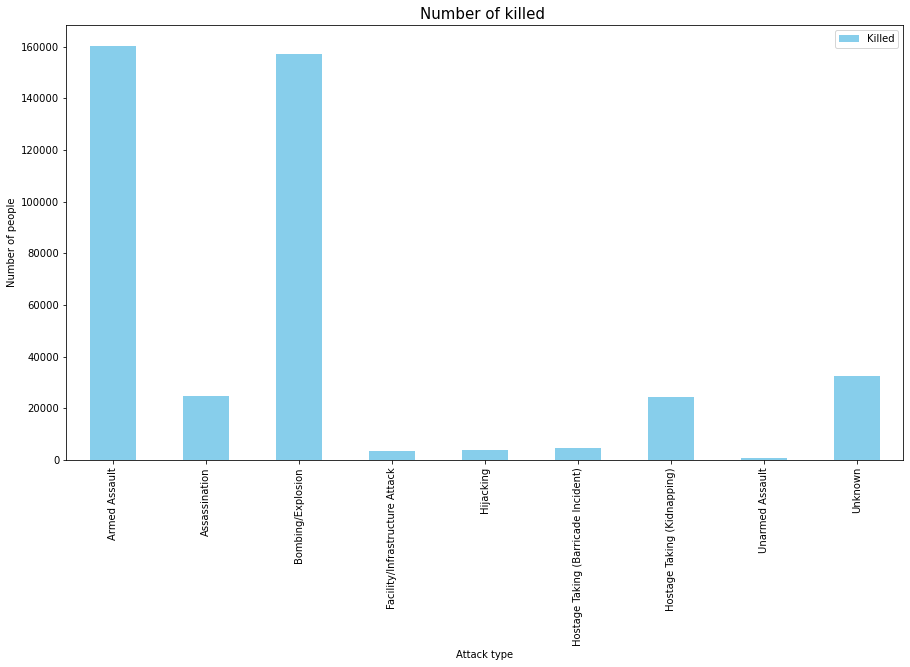

In [24]:
dataset[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum().plot(kind='bar',figsize=(15,8),color=['skyblue'])
plt.xticks(rotation=90)
plt.title("Number of killed ",fontsize=15)
plt.ylabel('Number of people')
plt.xlabel('Attack type')
plt.show()

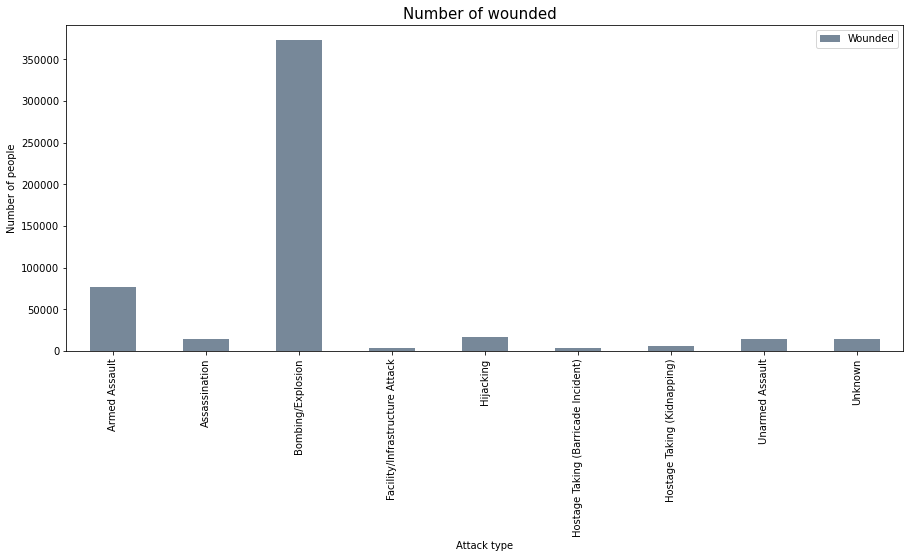

In [25]:
dataset[['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum().plot(kind='bar',figsize=(15,6),color=['lightslategray'])
plt.xticks(rotation=90)
plt.title("Number of wounded  ",fontsize=15)
plt.ylabel('Number of people')
plt.xlabel('Attack type')
plt.show()

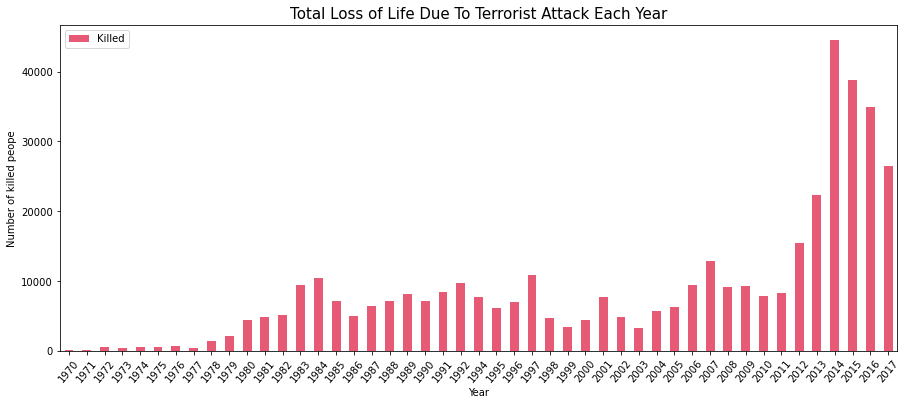

In [26]:
df = dataset[['Year','Killed']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(15,6))
df.plot(kind='bar',alpha=0.7,ax=ax4,color='crimson')
plt.xticks(rotation = 50)
plt.title("Total Loss of Life Due To Terrorist Attack Each Year",fontsize=15)
plt.ylabel("Number of killed peope")
plt.xlabel('Year')
plt.show()

#### Terrorist Attacks of a Particular year and their Locations

In [27]:
filterYear = dataset[dataset['Year'] == 2001].reset_index(drop=True)
filterYear

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,2001,1,0,Colombia,Valle del Cauca,South America,Unknown,3.800889,-76.641271,Unknown,3,0,Farmers in Valle province,1/8/2001: Paramilitaries killed three farmers ...,Paramilitaries,Private Citizens & Property,Unknown,"Specific motive is unknown; however, authoriti...",3
1,2001,1,1,Yemen,Adan,Middle East & North Africa,Aden,12.825647,44.846416,Bombing/Explosion,0,0,Aden Anglican Church,01/01/2001: The wall of an Anglican Church was...,Unknown,Religious Figures/Institutions,Explosives,Unknown,0
2,2001,1,1,Colombia,Bogota,South America,Bogota district,4.598100,-74.076030,Hostage Taking (Kidnapping),0,0,Colombian Peasants,01/01/2001: The United Self-defense Forces of ...,United Self Defense Units of Colombia (AUC),Private Citizens & Property,Unknown,The peasants were taken until it could be prov...,0
3,2001,1,1,Turkey,Istanbul,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0,10,Civilians celebrating the new year,1/1/2001: An improvised explosive device went ...,Unknown,Private Citizens & Property,Explosives,"Specific motive is unknown; however, sources s...",10
4,2001,1,1,Algeria,Djelfa,Middle East & North Africa,Djelfa,34.666667,3.250000,Unknown,5,1,An Algerian family in Djelfa,"1/1/2000: Unknown perpetrators, believed to be...",Algerian Islamic Extremists,Private Citizens & Property,Unknown,Part of a campaign by Islamic extremists to de...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,2001,12,28,Angola,Cuanza Norte,Sub-Saharan Africa,N'dalatando,-9.298851,14.916506,Armed Assault,2,2,Ndalatando Police Officers road between Ndalat...,"12/28/2001: Two police officers were killed, a...",National Union for the Total Independence of A...,Police,Firearms,Unknown,4
1902,2001,12,28,Uganda,Eastern,Sub-Saharan Africa,Mbale,1.078444,34.181006,Armed Assault,1,0,Michael Stachofsky,"12/28/2001: A prominent American missionary, M...",Unknown,Religious Figures/Institutions,Firearms,Unknown,1
1903,2001,12,30,India,Jammu and Kashmir,South Asia,Kanthol,33.322586,74.505312,Armed Assault,4,0,"Civilians in Kanthol, India",12/30/2001: Muslim militants killed four peopl...,Unknown,Private Citizens & Property,Firearms,Unknown,4
1904,2001,12,30,Russia,Chechnya (Republic),Eastern Europe,Grozny,43.320229,45.654491,Armed Assault,4,0,Russian soldiers in a military patrol in Grozn...,12/30/2001: A Russian patrol of military vehic...,Armed Forces of the Chechen Republic of Ichkeria,Military,Firearms,Unknown,4


In [28]:
reqFilterData = filterYear.loc[:,'city':'longitude'] 

# drop NaN values in latitude and longitude
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()
reqFilterDataList[:20]

[['Unknown', 3.800889, -76.641271],
 ['Aden', 12.825647, 44.846416],
 ['Bogota district', 4.5981, -74.07603],
 ['Istanbul', 41.106178, 28.689863],
 ['Djelfa', 34.666667, 3.25],
 ['Aden', 12.825647, 44.846416],
 ['Vranje', 42.55, 21.9],
 ['Glendale', 42.738006, -123.417103],
 ['Istanbul', 41.106178, 28.689863],
 ['Zurich', 47.36865, 8.539182],
 ['Keshpur', 22.556913, 87.461815],
 ['Yolombo', 6.598449, -75.011559],
 ['Laghouat', 33.80658, 2.878025],
 ['Bujumbura', -3.375828, 29.364107],
 ['Poonch', 33.767001, 74.092404],
 ['Srinagar', 34.08374, 74.789902],
 ['Argun', 43.3, 45.866667],
 ['Guatape', 6.23384, -75.1617],
 ['Ripon', 53.99212, -1.541812],
 ['Bachi-Yurt', 43.219708, 46.199835]]

Hence, we can depict that the maximum attacks carried out in the year 2001 was on the African Continent with almost 1325 attacks. Followed by the continent South America, which faced the highest number of attacks, i.e. 258 in the year 2001.

### People Died in Terrorist Attacks

In [29]:
# Total Number of people killed in terror attack
killData = dataset.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [30]:
# Types of attacks which lead to death
attackData = dataset.loc[:,'AttackType']
# Data on Attack
typeKillData = pd.concat([attackData, killData], axis=1)

In [31]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [32]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [33]:
# Number of People Killed in Terrorist Attacks in various Countries
countryData = dataset.loc[:,'Country']

countryKillData = pd.concat([countryData, killData], axis=1)
countryKillData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Country  181691 non-null  object
 1   Killed   181691 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 2.1+ MB


In [34]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


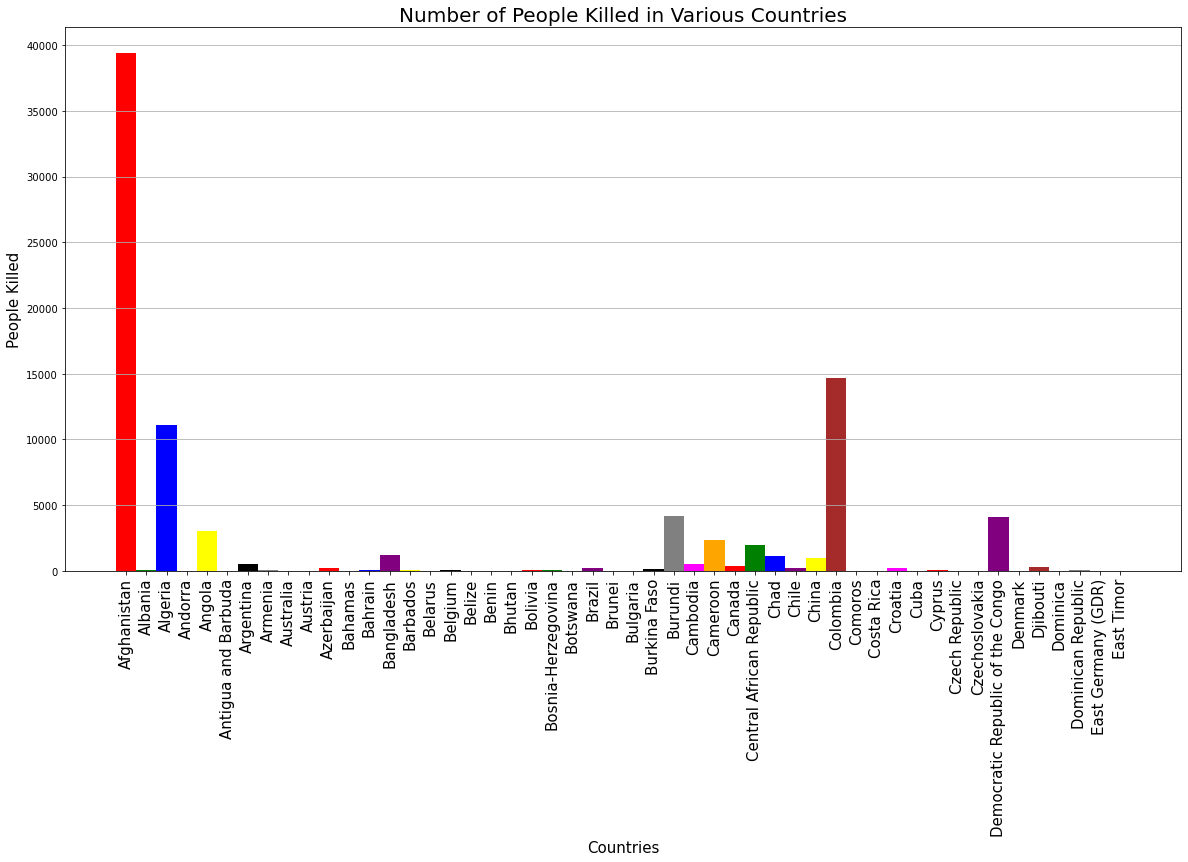

In [36]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.rcParams["figure.figsize"] = [20,10]
plt.bar(index, values, color = colors, width = 1)
plt.ylabel('People Killed',fontsize='15')
plt.xlabel('Countries',fontsize='15')
plt.xticks(index, labels,fontsize='15', rotation=90)
plt.title('Number of People Killed in Various Countries', fontsize = 20)
plt.show()

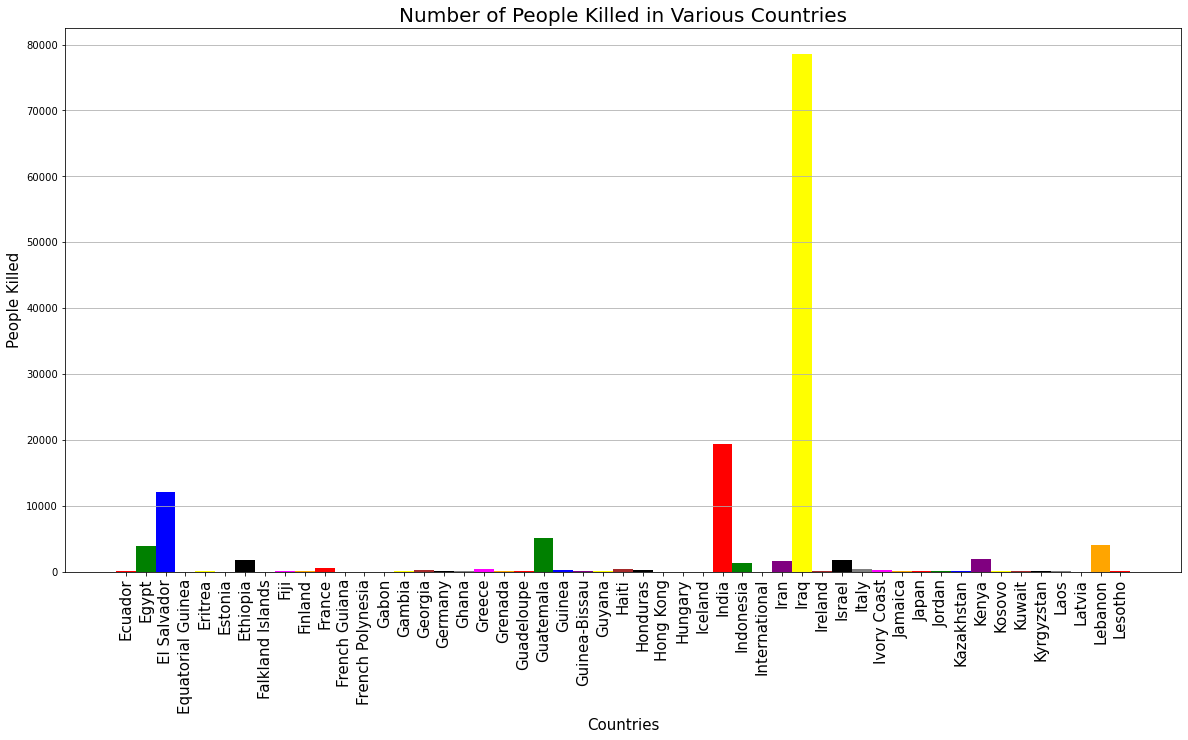

In [37]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.rcParams["figure.figsize"] = [20,10]
plt.bar(index, values, color = colors, width = 1)
plt.ylabel('People Killed', fontsize='15')
plt.xlabel('Countries', fontsize = '15')
plt.xticks(index, labels, fontsize = '15', rotation=90)
plt.title('Number of People Killed in Various Countries', fontsize = 20)
plt.show()

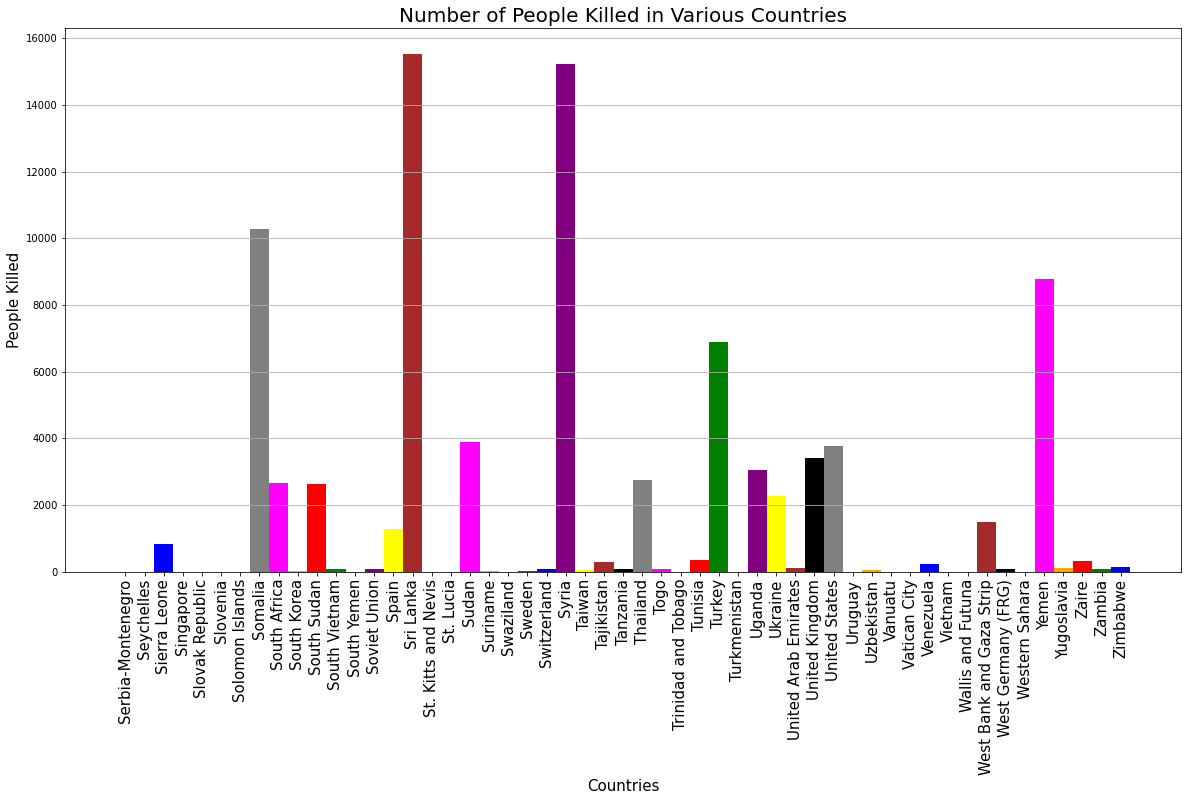

In [38]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
plt.rcParams["figure.figsize"] = [20,10]
plt.bar(index, values, color = colors, width = 1)
plt.ylabel('People Killed', fontsize='15')
plt.xlabel('Countries', fontsize = '15')
plt.xticks(index, labels, fontsize = '15', rotation=90)
plt.title('Number of People Killed in Various Countries', fontsize = 20)
plt.show()

#### Terrorist Attacks by Various Groups

In [39]:
dataset['Group'].value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

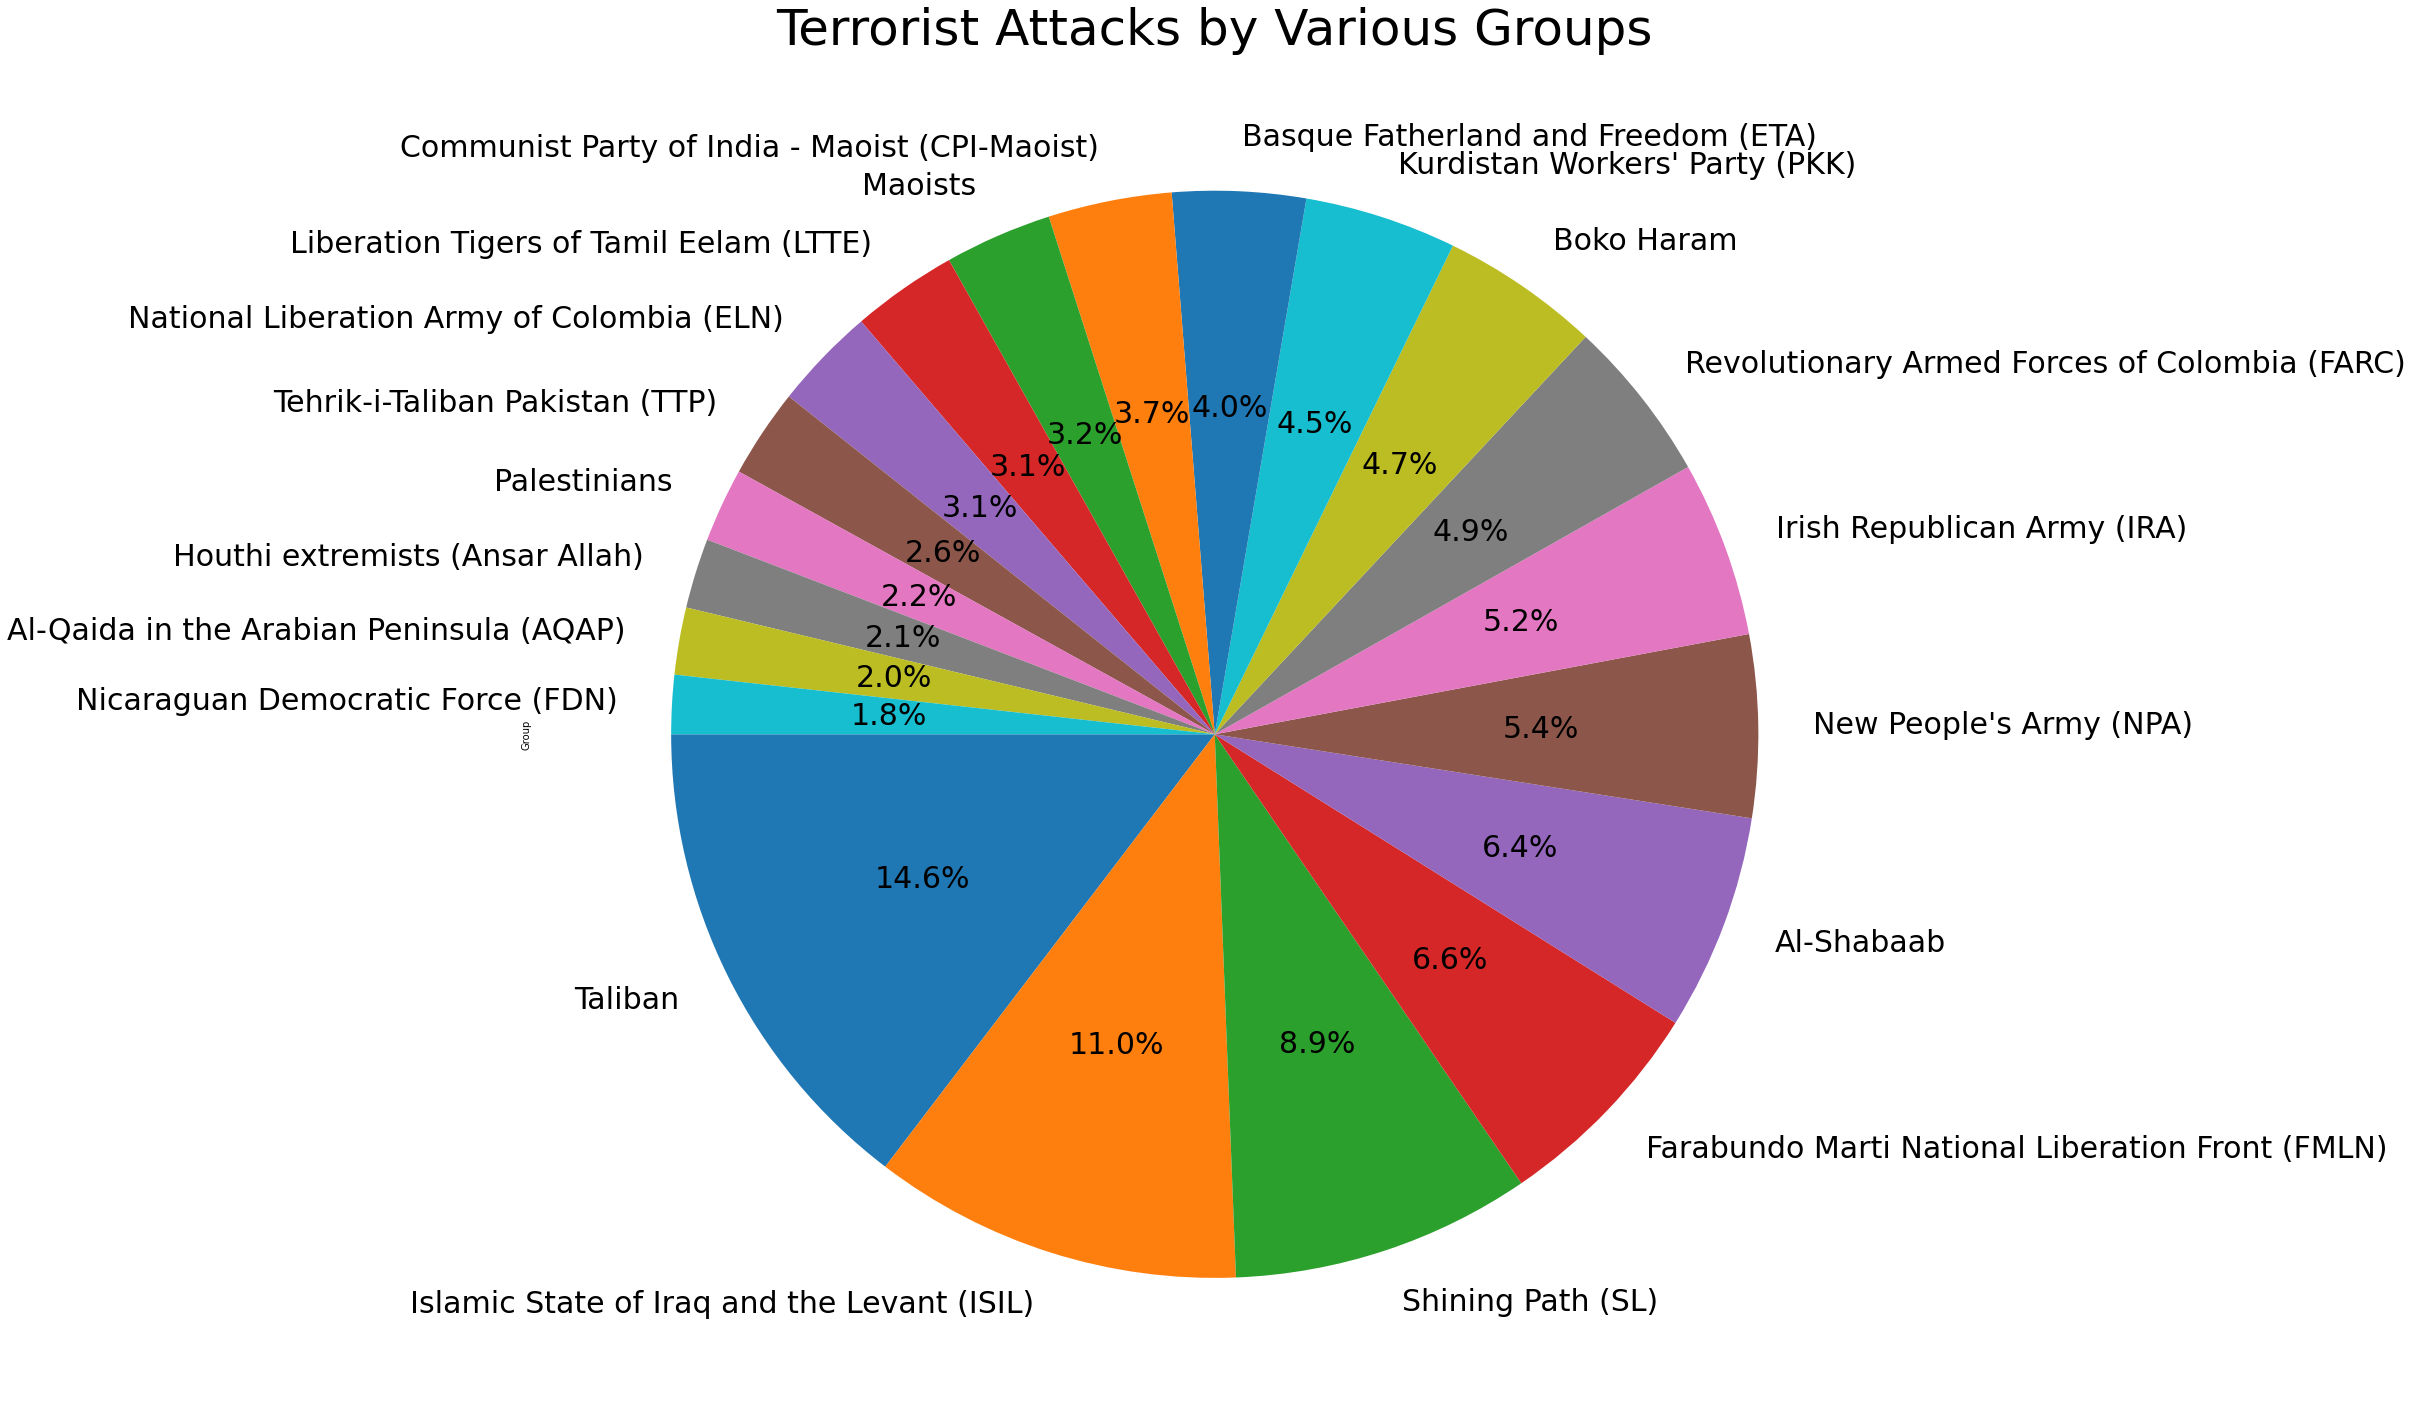

In [40]:
dataset['Group'].value_counts().drop('Unknown').head(20).plot(kind='pie',autopct='%1.1f%%',figsize=(25,25),startangle=180,fontsize='30')
plt.title("Terrorist Attacks by Various Groups",fontsize=50)
plt.show()

In [41]:
df=dataset[['Group','Country','Killed']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(20)
df

,Group,Country,Killed
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058
1,Taliban,Afghanistan,29269
2,Boko Haram,Nigeria,16917
3,Shining Path (SL),Peru,11595
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928
5,Al-Shabaab,Somalia,8176
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014


### 5) Conclusion

In [42]:
print("Country with the most attacks :",dataset['Country'].value_counts().idxmax())
print("City with the most attacks    :",dataset['city'].value_counts().index[1])
print("Region with the most attacks  :",dataset['Region'].value_counts().idxmax())
print("Year with the most attacks    :",dataset['Year'].value_counts().idxmax())
print("Month with the most attacks   :",dataset['Month'].value_counts().idxmax())
print("Group with the most attacks   :",dataset['Group'].value_counts().index[1])
print("Most Attack Types             :",dataset['AttackType'].value_counts().idxmax())

Country with the most attacks : Iraq
City with the most attacks    : Baghdad
Region with the most attacks  : Middle East & North Africa
Year with the most attacks    : 2014
Month with the most attacks   : 5
Group with the most attacks   : Taliban
Most Attack Types             : Bombing/Explosion


From the above graphs, we deduce that the countries where most people are killed are : Afghanisthan, Columbia, Iran, Sri lanka, Syria, Somalia, Yemen, etc. naming a few. Therefore, successfully carrying out the explanatory data analysis of global terrorism.